<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/semana9/aguas_subterraneas_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Andres Julian Hurtado|Rodrigo Ildefonso Roman Guzman|María de la Paz Rico Fernández|Semana 9 (Noviembre 14 2022)</h1>

<h1>Aguas Subterraneas</h1>

In [29]:
import pandas as pd
import numpy as np

#Importamos la base de datos de un vinculo a Google Drive
#Superficiales
# url = 'https://drive.google.com/file/d/1fXd6I_3oxXO-P6OrtRkVKbV0ZLttR2Dt/view?usp=sharing'
url = 'https://drive.google.com/file/d/1tQQ3xBMjld7WZzbFrTuWW5xD5UEtMW9x/view?usp=sharing'
path='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(path,encoding = "ISO-8859-1")
print('Contamos con {} datos'.format(df.shape[0]))

#Dado que muchos datos pueden estar codificados de manera diferente para los valores nulos
#vamos a estandarizar la manera de representarlos
df = df.replace(['NO DATA','N/A', 0,'ND', '','NaN'],np.nan)

df.iloc[:100,0:30]


Contamos con 1068 datos


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,DLCHI345,EL SAUZ-ENCINILLAS 2,RIO BRAVO,CHIHUAHUA,CHIHUAHUA,EL SAUZ-ENCINILLAS,POZO,-106.25620,29.06838,2020,...,135.6328,Potable - Dura,<1.1,Potable - Excelente,6.572807,Potable - Buena calidad,<0.01,Potable - Excelente,<0.003,Potable - Excelente
96,DLCHI359M1,MEOQUI-DELICIAS (21-A),RIO BRAVO,CHIHUAHUA,DELICIAS,MEOQUI-DELICIAS,POZO,-105.39353,28.23409,2020,...,653.136,Muy dura e indeseable usos industrial y domestico,<1.1,Potable - Excelente,7.574602,Potable - Buena calidad,<0.01,Potable - Excelente,<0.003,Potable - Excelente
97,DLCHI364M1,MEOQUI-DELICIAS (M-28),RIO BRAVO,CHIHUAHUA,JULIMES,MEOQUI-DELICIAS,POZO,-105.41464,28.42294,2020,...,428.839,Potable - Dura,14136,Fuertemente contaminada,2.926973,Potable - Excelente,0.1113,No apta como FAAP,<0.003,Potable - Excelente
98,DLCHI379,LOS JUNCOS 2,RIO BRAVO,CHIHUAHUA,OJINAGA,LOS JUNCOS,POZO,-104.66156,28.99189,2020,...,79.168,Potable - Moderadamente suave,697,Aceptable,3.75019,Potable - Excelente,0.0606,No apta como FAAP,<0.003,Potable - Excelente


<h3>Explorando los datos</h3>

In [30]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LONGITUD         -101.891007
LATITUD            23.163618
PERIODO          2020.000000
ALC_mg/L          235.633759
CONDUCT_mS/cm    1138.953013
SDT_mg/L                 NaN
dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [32]:
#Antes de graficar. Vamos a transformar el tipo de las variables que indican la presencia de 
#elementos en el agua. Actualmente estan en tipo objeto y vamos a cambiarlas a tipo float64
df['ALC_mg/L'] = df['ALC_mg/L'].astype(float)    

df['CONDUCT_mS/cm'] = df['CONDUCT_mS/cm'].astype(float)

# remplazamos valores como <25 por uno concreto que respete la logica que expresa
# para poder transformarlo al tipo adecuado
df['SDT_M_mg/L'][df.index[df['SDT_M_mg/L']=='<25'][0]] = '24'
df['SDT_M_mg/L'] = df['SDT_M_mg/L'].astype(float)

df['FLUORUROS_mg/L'][df.index[df['FLUORUROS_mg/L']=='<0.2'].tolist()] = '0.19'
df['FLUORUROS_mg/L'] = df['FLUORUROS_mg/L'].astype(float)

df['DUR_mg/L'][df.index[df['DUR_mg/L']=='<20'].tolist()] = '19'
df['DUR_mg/L'] = df['DUR_mg/L'].astype(float)

# Cambiamos <1.1
df['COLI_FEC_NMP/100_mL'][df.index[df['COLI_FEC_NMP/100_mL']=='<1.1'].tolist()] = '1.0'
df['COLI_FEC_NMP/100_mL'] = df['COLI_FEC_NMP/100_mL'].astype(float)

# Cambiamos <0.02 por 0.01
df['N_NO3_mg/L'][df.index[df['N_NO3_mg/L']=='<0.02'].tolist()] = '0.01'
df['N_NO3_mg/L'] = df['N_NO3_mg/L'].astype(float)

df['AS_TOT_mg/L'][df.index[df['AS_TOT_mg/L']=='<0.01'].tolist()] = '0.009'
df['AS_TOT_mg/L'] = df['AS_TOT_mg/L'].astype(float)   

df['CD_TOT_mg/L'][df.index[df['CD_TOT_mg/L']=='<0.003'].tolist()] = '0.002'
df['CD_TOT_mg/L'] = df['CD_TOT_mg/L'].astype(float)

df['CR_TOT_mg/L'][df.index[df['CR_TOT_mg/L']=='<0.005'].tolist()] = '0.004'
df['CR_TOT_mg/L'] = df['CR_TOT_mg/L'].astype(float)

df['HG_TOT_mg/L'][df.index[df['HG_TOT_mg/L']=='<0.0005'].tolist()] = '0.0004'
df['HG_TOT_mg/L'] = df['HG_TOT_mg/L'].astype(float)      

df['PB_TOT_mg/L'][df.index[df['PB_TOT_mg/L']=='<0.005'].tolist()] = '0.004'
df['PB_TOT_mg/L'] = df['PB_TOT_mg/L'].astype(float)  

df['MN_TOT_mg/L'][df.index[df['MN_TOT_mg/L'] =='<0.0015'].tolist()] = '0.0014'
df['MN_TOT_mg/L'] = df['MN_TOT_mg/L'].astype(float)  

df['FE_TOT_mg/L'][df.index[df['FE_TOT_mg/L'] =='<0.025'].tolist()] = '0.024'
df['FE_TOT_mg/L'] = df['FE_TOT_mg/L'].astype(float)


#Creamos una copia antes de eliminar columnas para usarla despues
df_copy = df.copy(deep=False)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/pyth

In [33]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0,1066.000000,1068.000000,1067.000000,1068.000000,1067.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN,896.100629,1.074083,347.913705,355.421348,4.319150,0.018855,0.002032,0.012476,0.000467,0.004310,0.072427,0.410012
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN,2751.530888,1.924973,359.691723,2052.468941,8.345448,0.035420,0.000928,0.154435,0.000479,0.003342,0.376522,5.538000
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN,24.000000,0.190000,19.000000,1.000000,0.010000,0.009000,0.002000,0.004000,0.000400,0.004000,0.001400,0.024000
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN,337.500000,0.267175,121.194800,1.000000,0.650294,0.009000,0.002000,0.004000,0.000400,0.004000,0.001400,0.024000
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN,550.400000,0.503500,245.335800,1.000000,2.080932,0.009000,0.002000,0.004000,0.000400,0.004000,0.001400,0.046960
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN,916.100000,1.139850,453.930000,13.250000,5.201698,0.009000,0.002000,0.004000,0.000400,0.004000,0.009947,0.173380
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


In [34]:
import seaborn as sns 
import matplotlib.pyplot as plt

<h3>Estandarizamos los datos</h3>

In [35]:
#Hay muchas variables de las que podemos precindir. A continuacion realizamos 
#una reduccion de las variables que tomaremos en cuenta

#La clave es unicamente un identificador y no lo necesitamos
df.drop('CLAVE', axis=1, inplace=True)

#Las variables que removemos a continuacion tienen un proposito de 
#relacionar las muestras con una ubicacion en particular.
#Sin embargo para nuestro porposito solo ocuparemos latitud y longitud
df.drop('SITIO', axis=1, inplace=True)
df.drop('ORGANISMO_DE_CUENCA', axis=1, inplace=True)
df.drop('ESTADO', axis=1, inplace=True)
df.drop('MUNICIPIO', axis=1, inplace=True)
df.drop('ACUIFERO', axis=1, inplace=True)
df.drop('SUBTIPO', axis=1, inplace=True)

#Removemos el año porque no hay variabilidad relevante en este sentido
df.drop('PERIODO', axis=1, inplace=True)

#Quitaremos todas la variables continuas que registran el contenido de elementos
#quimicos. Esto debido principalmente a que estan totalmente correlacionadas
#con variables categoricas que indican que tan bueno es el valor registrado para
#cada una de ellas. Dado que tenemos estas otras variables, las variables continuas
#se vuelven redundantes. Por otro lado si hubieramos optado por quedarnos con las
#variables continuas en vez de las variables categoricas, habria sido mas dificil
#interpretar los valores. (Como habriamos dado con el valor optimo para su consumo?) 
#Ademas para los ejercicios futuros. Lidiar con variables categoricas es preferible 
#a lidiar con variables numericas
df.drop('ALC_mg/L',axis=1,inplace=True)                  
df.drop('CONDUCT_mS/cm',axis=1,inplace=True)              
df.drop('SDT_mg/L',axis=1,inplace=True)
df.drop('SDT_M_mg/L',axis=1,inplace=True)   
df.drop('FLUORUROS_mg/L',axis=1,inplace=True)            
df.drop('DUR_mg/L',axis=1,inplace=True)                  
df.drop('COLI_FEC_NMP/100_mL',axis=1,inplace=True)       
df.drop('N_NO3_mg/L',axis=1,inplace=True)                
df.drop('AS_TOT_mg/L',axis=1,inplace=True)               
df.drop('CD_TOT_mg/L',axis=1,inplace=True)               
df.drop('CR_TOT_mg/L',axis=1,inplace=True)               
df.drop('HG_TOT_mg/L',axis=1,inplace=True)               
df.drop('PB_TOT_mg/L',axis=1,inplace=True)               
df.drop('MN_TOT_mg/L',axis=1,inplace=True)               
df.drop('FE_TOT_mg/L',axis=1,inplace=True)  

#Tiramos la columna de contaminates porque esta bastante incompleta y ademas
#Aporta datos especificos que no necesitamos porque ademas son redundantes
#(enumera los elementos que no cumplieron)
df.drop('CONTAMINANTES',axis=1,inplace=True)  

df.iloc[0:10,0:20]


,LONGITUD,LATITUD,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND
0,-102.022100,22.208870,Alta,Permisible para riego,Cultivos sensibles,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,SI,SI
1,-102.200750,21.999580,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Buena calidad,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,SI,SI
2,-102.288010,22.366850,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Alta,Potable - Dura,Potable - Excelente,Potable - Excelente,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Rojo,SI,SI
3,-102.294490,22.184350,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,SI,SI
4,-110.244800,23.451380,Alta,Permisible para riego,Cultivos con manejo especial,Ligeramente salobres,Baja,Potable - Dura,Aceptable,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Rojo,SI,SI
5,-110.220670,23.464930,Alta,Buena para riego,Cultivos sensibles,Potable - Dulce,Baja,Potable - Dura,Contaminada,Potable - Buena calidad,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Rojo,SI,SI
6,-110.213960,23.474600,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Baja,Potable - Dura,Buena calidad,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,SI,SI
7,-109.907306,22.890500,Alta,Dudosa para riego,Cultivos con manejo especial,Ligeramente salobres,Media,Potable - Dura,Aceptable,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Rojo,SI,NO
8,-110.088778,23.799861,Alta,Permisible para riego,Cultivos sensibles,Potable - Dulce,Baja,Potable - Dura,Buena calidad,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,SI,SI
9,-110.054722,23.824722,Alta,Permisible para riego,Cultivos con manejo especial,Ligeramente salobres,Media,Muy dura e indeseable usos industrial y domestico,Contaminada,Potable - Excelente,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Puede afectar la salud,Sin efectos en la salud - Puede dar color al agua,Rojo,SI,SI


<h3>Preparacion de los datos</h3>
<h4><li>One Hot Encoding</li></h4>

In [36]:
#Vamos a transformar nuestros datos que en su mayoria son categoricos a una forma
#en que podamos usarlos para analisis de k-means. Utilizaremos ONE-HOT-ENCODING
#Las variables que cambiaremos a categoricas:
#CALIDAD_ALC	CALIDAD_CONDUC	CALIDAD_SDT_ra	CALIDAD_SDT_salin	CALIDAD_FLUO
#CALIDAD_DUR	CALIDAD_COLI_FEC	CALIDAD_N_NO3	CALIDAD_AS	CALIDAD_CD	CALIDAD_CR	
#CALIDAD_HG	CALIDAD_PB	CALIDAD_MN	CALIDAD_FE	SEMAFORO

#Todas menos latitud y longitud

from sklearn.preprocessing import OneHotEncoder

#Creamos instancia de one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')


renamedVars = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND',
       'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO',
       'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS',
       'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB','CUMPLE_CON_MN', 'CUMPLE_CON_FE',
       'CALIDAD_ALC', 'CALIDAD_CONDUC', 'CALIDAD_SDT_ra',	'CALIDAD_SDT_salin',	'CALIDAD_FLUO',
       'CALIDAD_DUR',	'CALIDAD_COLI_FEC',	'CALIDAD_N_NO3',	'CALIDAD_AS',	'CALIDAD_CD',	'CALIDAD_CR',	
       'CALIDAD_HG',	'CALIDAD_PB',	'CALIDAD_MN',	'CALIDAD_FE',	'SEMAFORO']

#Hot Ecode cada una de las variables de arriba
final_df = df.copy()
for colName in renamedVars:
  #realizamos la one-hot codificacion de la variable columna 'CALIDAD_ALC' 
  encoder_df = pd.DataFrame(encoder.fit_transform(df[[colName]]).toarray())

  #merger columnas one-hot al DataFrame original
  final_df = final_df.join(encoder_df)

  #Removemos la columna de la variable original por que ya no la necesitamos
  final_df.drop(colName, axis=1, inplace=True)

  #Generamos las etiquetas nuevas para las columnas
  labels = []
  for i in range(encoder_df.shape[1]):
    labels.append(colName+str(i))

  #Renombramos nuestras columnas con las etiquetas apropiadas (enumeradas)
  #siempre aparecen al final las nuevas columnas
  newCols = list(final_df.iloc[:,0:-(encoder_df.shape[1]):].columns)+labels
  final_df.columns = newCols



#view final df
print('Estas son las columnas resultantes')
print(final_df.columns)

print('Nuestros datos one hot econcoded')
final_df.head()

Estas son las columnas resultantes
Index(['LONGITUD', 'LATITUD', 'CUMPLE_CON_ALC0', 'CUMPLE_CON_ALC1',
       'CUMPLE_CON_ALC2', 'CUMPLE_CON_COND0', 'CUMPLE_CON_COND1',
       'CUMPLE_CON_COND2', 'CUMPLE_CON_SDT_ra0', 'CUMPLE_CON_SDT_ra1',
       'CUMPLE_CON_SDT_ra2', 'CUMPLE_CON_SDT_salin0', 'CUMPLE_CON_SDT_salin1',
       'CUMPLE_CON_SDT_salin2', 'CUMPLE_CON_FLUO0', 'CUMPLE_CON_FLUO1',
       'CUMPLE_CON_DUR0', 'CUMPLE_CON_DUR1', 'CUMPLE_CON_DUR2',
       'CUMPLE_CON_CF0', 'CUMPLE_CON_CF1', 'CUMPLE_CON_NO30',
       'CUMPLE_CON_NO31', 'CUMPLE_CON_NO32', 'CUMPLE_CON_AS0',
       'CUMPLE_CON_AS1', 'CUMPLE_CON_CD0', 'CUMPLE_CON_CD1', 'CUMPLE_CON_CR0',
       'CUMPLE_CON_CR1', 'CUMPLE_CON_HG0', 'CUMPLE_CON_HG1', 'CUMPLE_CON_PB0',
       'CUMPLE_CON_PB1', 'CUMPLE_CON_MN0', 'CUMPLE_CON_MN1', 'CUMPLE_CON_FE0',
       'CUMPLE_CON_FE1', 'CALIDAD_ALC0', 'CALIDAD_ALC1', 'CALIDAD_ALC2',
       'CALIDAD_ALC3', 'CALIDAD_ALC4', 'CALIDAD_CONDUC0', 'CALIDAD_CONDUC1',
       'CALIDAD_CONDUC2', 'CALIDA

,LONGITUD,LATITUD,CUMPLE_CON_ALC0,CUMPLE_CON_ALC1,CUMPLE_CON_ALC2,CUMPLE_CON_COND0,CUMPLE_CON_COND1,CUMPLE_CON_COND2,CUMPLE_CON_SDT_ra0,CUMPLE_CON_SDT_ra1,...,CALIDAD_PB0,CALIDAD_PB1,CALIDAD_MN0,CALIDAD_MN1,CALIDAD_MN2,CALIDAD_FE0,CALIDAD_FE1,SEMAFORO0,SEMAFORO1,SEMAFORO2
0,-102.02210,22.20887,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-102.20075,21.99958,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-102.28801,22.36685,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-102.29449,22.18435,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-110.24480,23.45138,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<h2>Segunda parte<h2>
<h4><li>Arbol de decision y random forest</li></h4>

In [37]:

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

#Separamos la variable objetivo de las de entrenamiento
train_copy = final_df.copy() 
train_copy.drop(labels = ['SEMAFORO0','SEMAFORO1','SEMAFORO2'],axis = 1,inplace = True)
X = train_copy # Caracteristicas
y = final_df[['SEMAFORO0','SEMAFORO1','SEMAFORO2']] # Objetivo


<p>Primero entrenaremos con todas la variables</p>

In [38]:
#Separamos las variables en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% entrenamiento y 30% prueba

In [39]:
clf = DecisionTreeClassifier()

#Entrenamos el con el arbol de decision
clf = clf.fit(X_train,y_train)

#Predecimos un set de objetivos
y_pred = clf.predict(X_test)


#Revisemos la precision del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9906542056074766


<p>Vamos a visualizar el arbol por medio de la libreria graphviz</p>

In [40]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


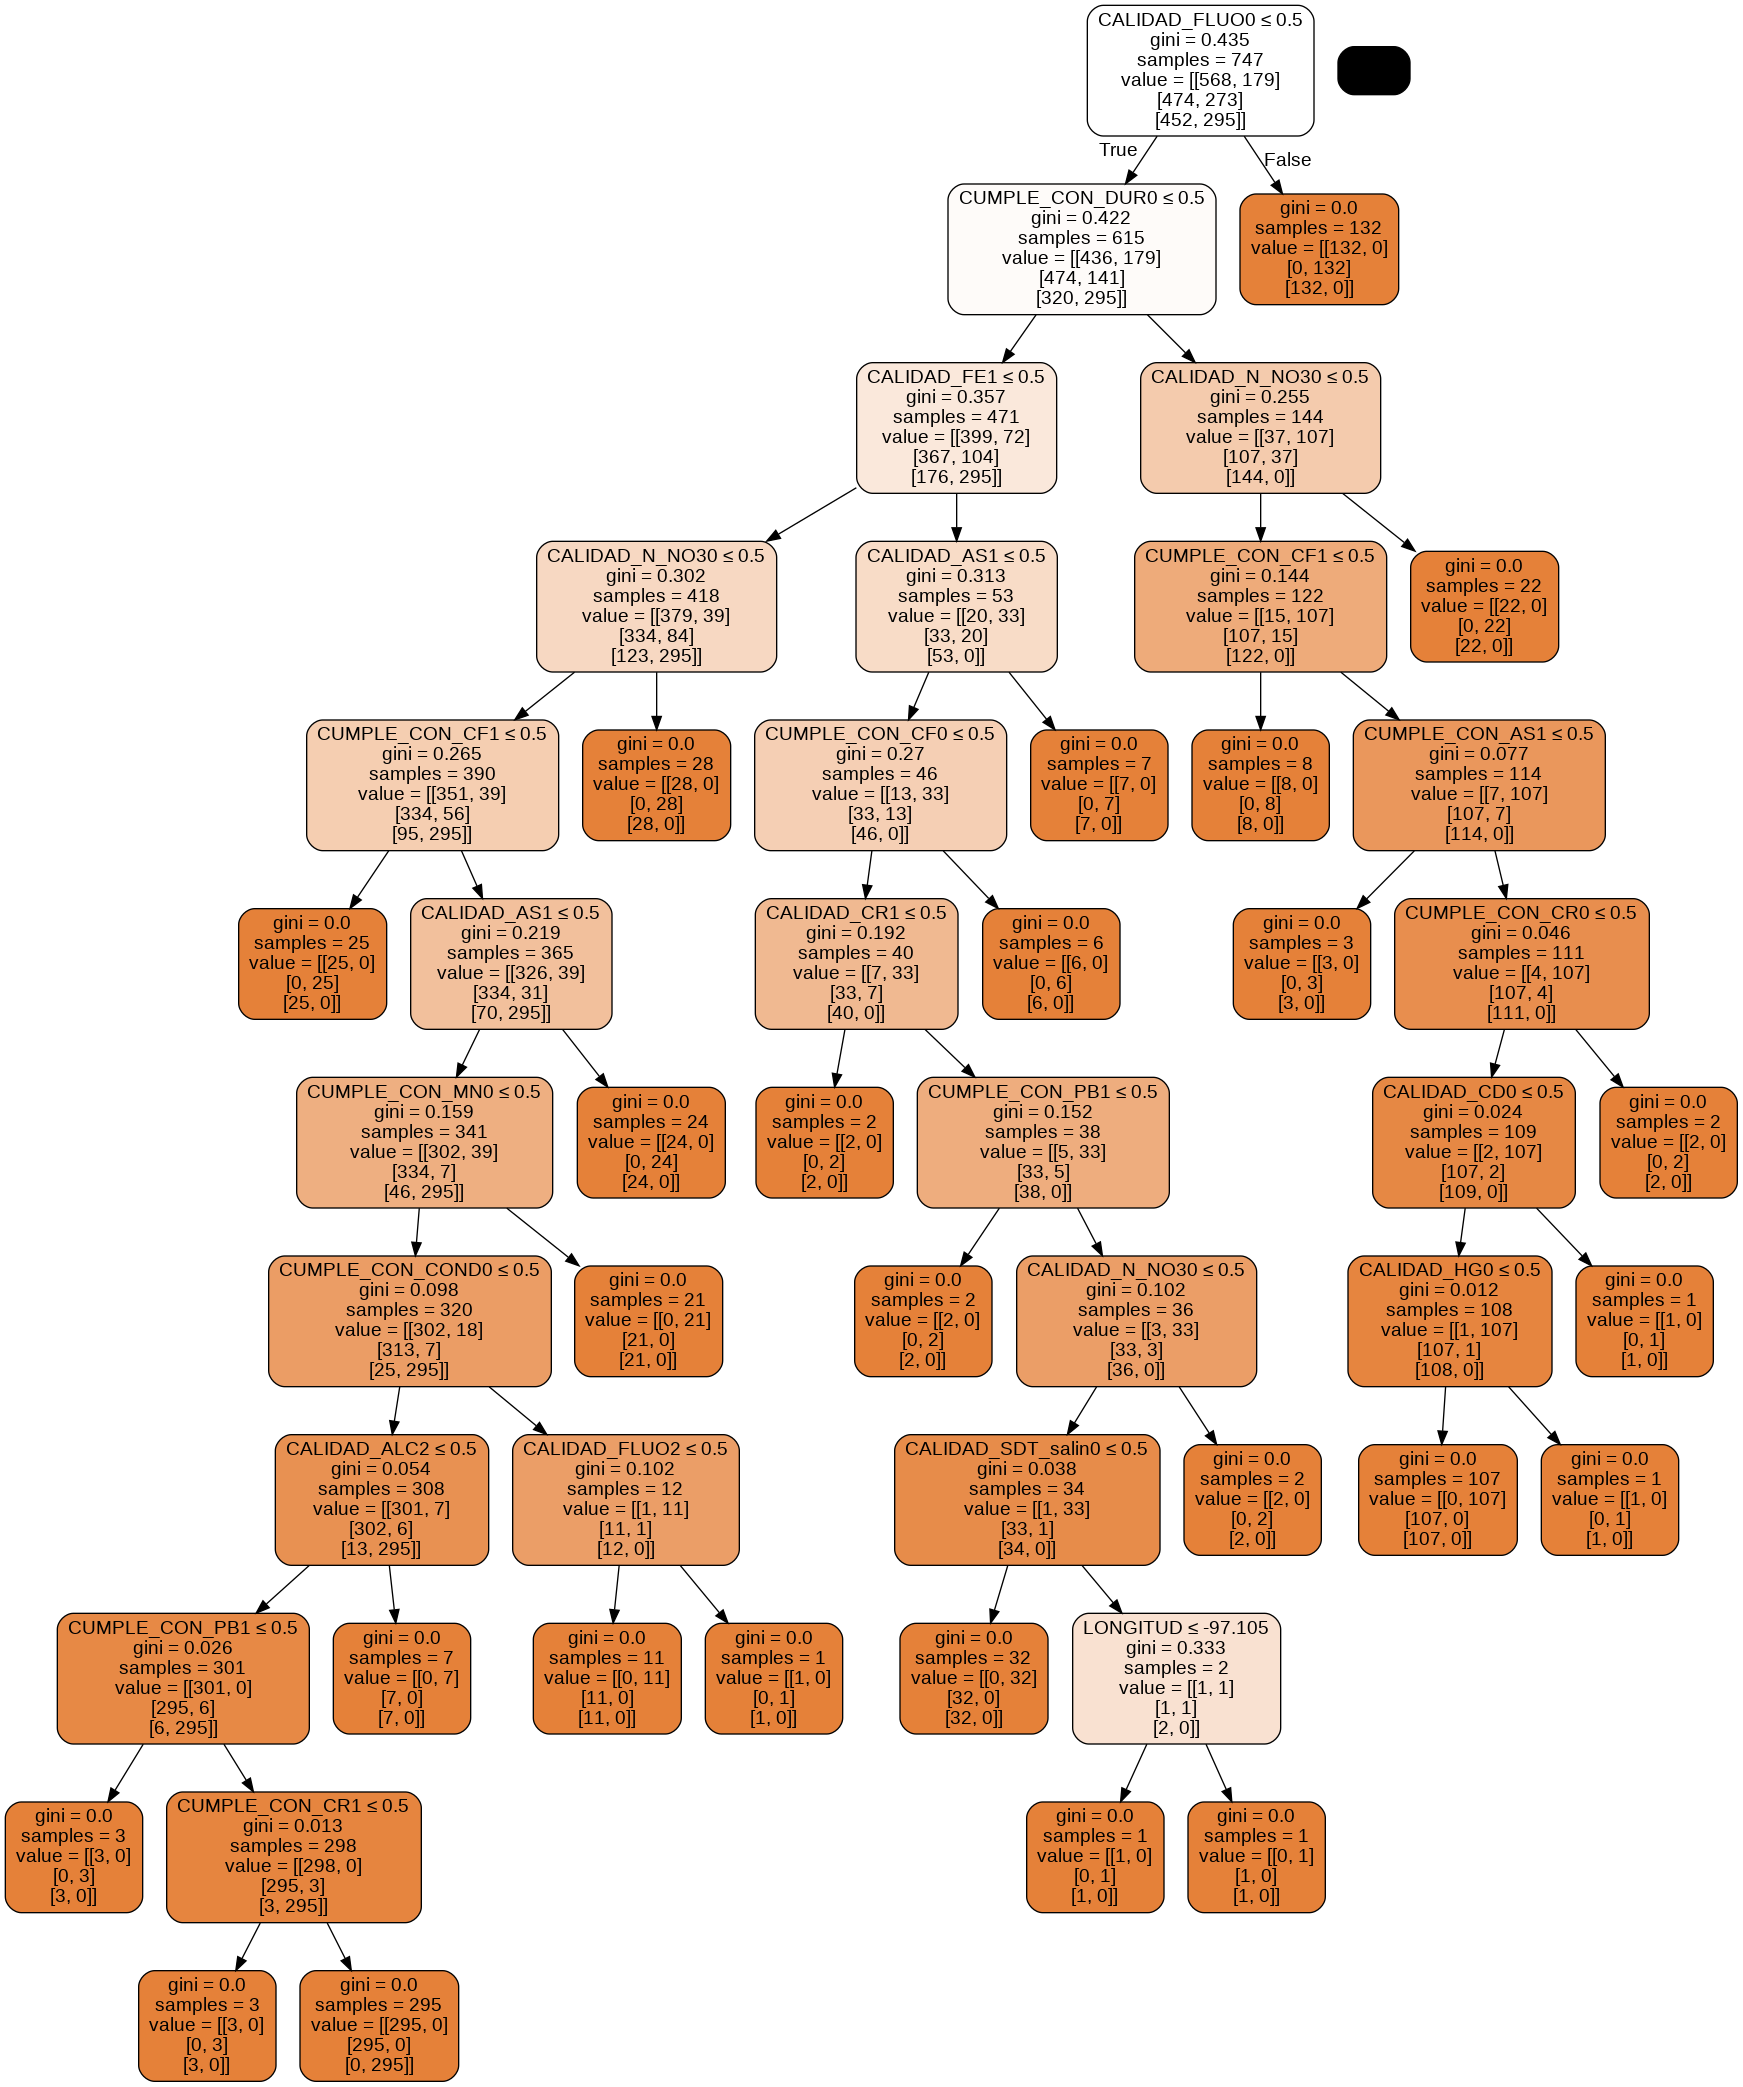

In [42]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = train_copy.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('aguas_subterraneas.png')
Image(graph.create_png())

In [43]:
#Ahora tenemos una referencia clara de la importancia de cada variable
print('Importancia de cada una de las variables')
for i in range(len(clf.feature_names_in_)):
  print(clf.feature_names_in_[i],' = ',clf.feature_importances_[i])

Importancia de cada una de las variables
LONGITUD  =  0.002049866360787456
LATITUD  =  0.0
CUMPLE_CON_ALC0  =  0.0
CUMPLE_CON_ALC1  =  0.0
CUMPLE_CON_ALC2  =  0.0
CUMPLE_CON_COND0  =  0.040736157824706194
CUMPLE_CON_COND1  =  0.0
CUMPLE_CON_COND2  =  0.0
CUMPLE_CON_SDT_ra0  =  0.0
CUMPLE_CON_SDT_ra1  =  0.0
CUMPLE_CON_SDT_ra2  =  0.0
CUMPLE_CON_SDT_salin0  =  0.0
CUMPLE_CON_SDT_salin1  =  0.0
CUMPLE_CON_SDT_salin2  =  0.0
CUMPLE_CON_FLUO0  =  0.0
CUMPLE_CON_FLUO1  =  0.0
CUMPLE_CON_DUR0  =  0.16772116836320936
CUMPLE_CON_DUR1  =  0.0
CUMPLE_CON_DUR2  =  0.0
CUMPLE_CON_CF0  =  0.01455850739281004
CUMPLE_CON_CF1  =  0.09903669149998158
CUMPLE_CON_NO30  =  0.0
CUMPLE_CON_NO31  =  0.0
CUMPLE_CON_NO32  =  0.0
CUMPLE_CON_AS0  =  0.0
CUMPLE_CON_AS1  =  0.011127984810173365
CUMPLE_CON_CD0  =  0.0
CUMPLE_CON_CD1  =  0.0
CUMPLE_CON_CR0  =  0.0077589618859924174
CUMPLE_CON_CR1  =  0.012175380733536231
CUMPLE_CON_HG0  =  0.0
CUMPLE_CON_HG1  =  0.0
CUMPLE_CON_PB0  =  0.0
CUMPLE_CON_PB1  =  0.018459

<h2>Random Forest</h2>

In [44]:
from sklearn.ensemble import RandomForestClassifier

train_copy = final_df.copy() 
train_copy.drop(labels = ['SEMAFORO0','SEMAFORO1','SEMAFORO2'],axis = 1,inplace = True)
X = train_copy # Caracteristicas
y = final_df[['SEMAFORO0','SEMAFORO1','SEMAFORO2']] # Objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% entrenamiento y 30% prueba

#Creaando el clasificador
clf=RandomForestClassifier(n_estimators=80)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Precision de Random Forest:",metrics.accuracy_score(y_test, y_pred))


Precision de Random Forest: 0.9844236760124611


<p>Revisemos las caracteristicas mas importantes</p>

In [45]:
feature_imp = pd.Series(clf.feature_importances_,index=clf.feature_names_in_).sort_values(ascending=False)

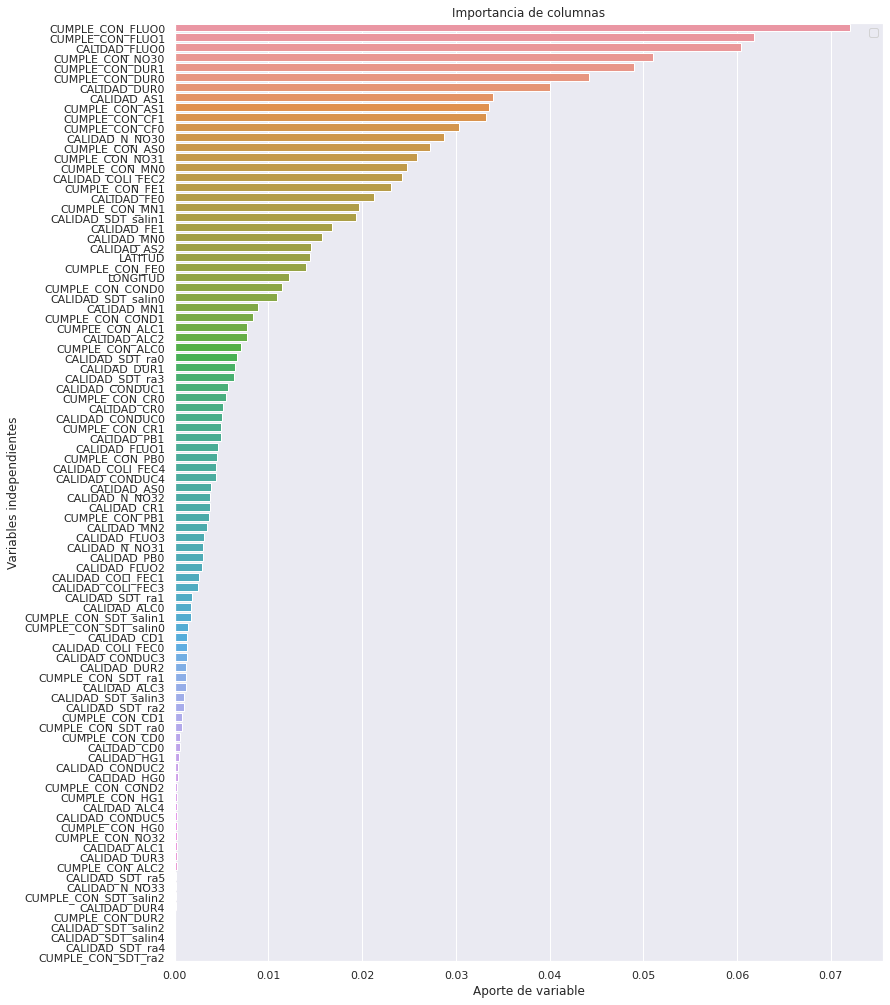

In [46]:
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(12.7,17.27)})
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Aporte de variable')
plt.ylabel('Variables independientes')
plt.title("Importancia de columnas")
plt.legend()
plt.show()

<p><li>Notamos que hay algunas variables que no aportan mucho e incluso hay algunas que no apartan nada al modelo.</li></p>
<p><li>Podemos generar un modelo menos robusto que conserve la informacion si removemos las caracteristicas menos importantes</li></p>

In [47]:
#vamos a remover un tercio de las variables originales
reduced_set = final_df.copy() 
two_thirds= int((len(feature_imp.keys())/3)*2)
reduced_set = reduced_set[feature_imp.keys()[:two_thirds:]]


In [48]:
X = reduced_set # Caracteristicas
y = final_df[['SEMAFORO0','SEMAFORO1','SEMAFORO2']] # Objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% entrenamiento y 30% prueba

#Creaando el clasificador
clf=RandomForestClassifier(n_estimators=80)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Precision de Random Forest con 1/3 menos:",metrics.accuracy_score(y_test, y_pred))

Precision de Random Forest con 1/3 menos: 0.9875389408099688


<h3>Vemos con con un 1/3 menos de datos no perdemos informacion!</h3>

<h2><li>Ensamble de clasificadores</li></h2>

In [59]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=42,shuffle=True)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
y_tr = y_train.apply(lambda x: x.argmax(), axis=1).values
ensemble.fit(X_train,y_tr)
y_pred = ensemble.predict(X_test)
y_t = y_test.apply(lambda x: x.argmax(), axis=1).values

print("Precision del ensamble:",metrics.accuracy_score(y_t, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0 1 2 2 2 2 1 1 0 1 0 2 2 0 1 2 2 0 1 2 0 0 2 0 2 2 2 0 0 2 1 0 2 2 1 2 0
 1 2 2 0 1 2 0 1 1 1 2 2 2 1 2 0 2 2 0 1 2 1 2 1 1 2 2 0 1 1 2 1 2 0 1 0 0
 2 1 0 1 0 2 2 2 0 0 2 1 2 2 2 1 1 1 1 2 1 1 1 1 1 2 1 1 0 2 2 1 0 2 2 1 2
 2 2 2 1 0 1 1 0 2 2 1 0 0 2 2 2 1 0 2 2 2 0 1 2 2 2 0 2 2 1 2 1 1 1 1 2 1
 2 0 1 2 2 1 1 2 0 1 2 0 1 2 2 1 1 0 1 2 1 1 1 0 2 2 2 0 1 1 2 2 1 2 2 1 0
 2 2 1 0 1 0 0 1 2 1 2 1 0 1 2 0 1 2 2 2 1 1 1 2 2 1 1 2 1 2 2 0 2 2 1 2 1
 2 1 0 1 0 1 1 1 0 2 1 2 0 0 2 1 1 2 0 2 2 2 1 0 1 1 0 2 1 1 0 2 2 2 2 0 2
 1 2 1 1 2 1 2 1 0 2 1 2 2 0 1 2 2 2 2 2 1 2 2 2 0 1 0 1 2 2 1 2 2 2 1 1 1
 1 1 2 0 0 1 1 2 1 2 0 2 2 0 2 0 2 0 1 2 0 2 2 2 2]
Precision del ensamble: 0.9844236760124611
